<a href="https://colab.research.google.com/github/nazbeh/I_C_M_E_2020/blob/master/Workshop3/KerasWalkthrough.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Keras Example

Authors: Anjan Dwaraknath and Sherrie Wang

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

## Load MNIST dataset

In [ ]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


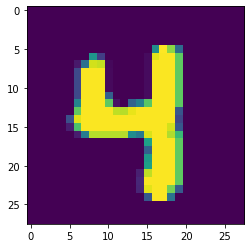

In [ ]:
plt.imshow(x_train[58])
plt.show()

## Build and train a Sequential Model

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Reshape
from keras.losses import SparseCategoricalCrossentropy

In [ ]:
model = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(25, input_shape=(784,)),
    Activation('relu'),
    Dense(25, input_shape=(25,)),
    Activation('relu'),
    Dense(10),
])

In [ ]:
loss_fn = SparseCategoricalCrossentropy(from_logits=True)

In [ ]:
model.compile(loss=loss_fn, optimizer="sgd", metrics=["accuracy"])

In [ ]:
model.fit(x_train, y_train, batch_size=32)

1875/1875 [==============================] - 3s 2ms/step - loss: 0.8525 - accuracy: 0.7542


In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3814 - accuracy: 0.8923


[0.38138484954833984, 0.892300009727478]

## Plot losses

Using the package https://github.com/stared/livelossplot

Install using the command `pip install livelossplot`

In [ ]:
!pip install livelossplot

In [ ]:
!ls

sample_data


In [ ]:
model.compile(loss=loss_fn, optimizer="sgd", metrics=["accuracy"])
model.optimizer.lr = 0.01

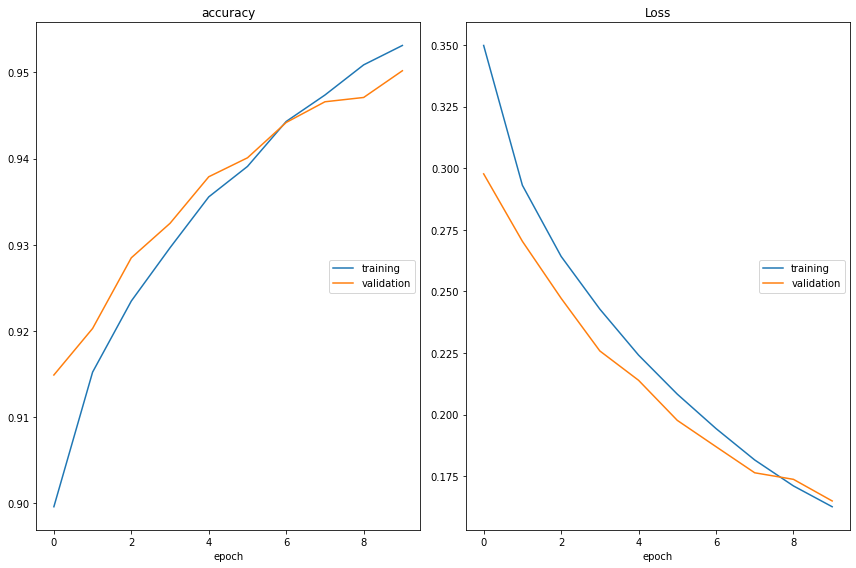

accuracy
	training         	 (min:    0.900, max:    0.953, cur:    0.953)
	validation       	 (min:    0.915, max:    0.950, cur:    0.950)
Loss
	training         	 (min:    0.163, max:    0.350, cur:    0.163)
	validation       	 (min:    0.165, max:    0.298, cur:    0.165)


In [ ]:
from livelossplot import PlotLossesKeras

model.fit(x_train, y_train,
          epochs=10,
          validation_data=(x_test, y_test),
          callbacks=[PlotLossesKeras()],
          verbose=0)

## Plot Weights

In [ ]:
def plot_grid(grid_array, nrows = 16, ncols = 32):
    '''
    Plots a list of images on a grid
    
    Arguments
        grid_array - numpy array of shape (1,h,w,numimgs)
        nrows,ncols - the number of rows and cols in the grid, they
                    should multiply to numimgs
    Output
        displays a large plot of the images on a grid
    '''
    init_shape = grid_array.shape

    assert(nrows*ncols == init_shape[3])
    assert(1 == init_shape[0])

    grid_image = (grid_array.reshape(init_shape[1],init_shape[2],init_shape[3]).transpose(2,0,1)
     .reshape(nrows,ncols,init_shape[1],init_shape[2]).swapaxes(1,2)
               .reshape(nrows*init_shape[1],ncols*init_shape[2]))

    plt.figure(figsize=(20,20))
    plt.imshow(grid_image)

In [ ]:
W1, b1, W2, b2, W3, b3 = model.get_weights()

In [ ]:
W1.reshape(1,28,28,-1).shape

(1, 28, 28, 25)

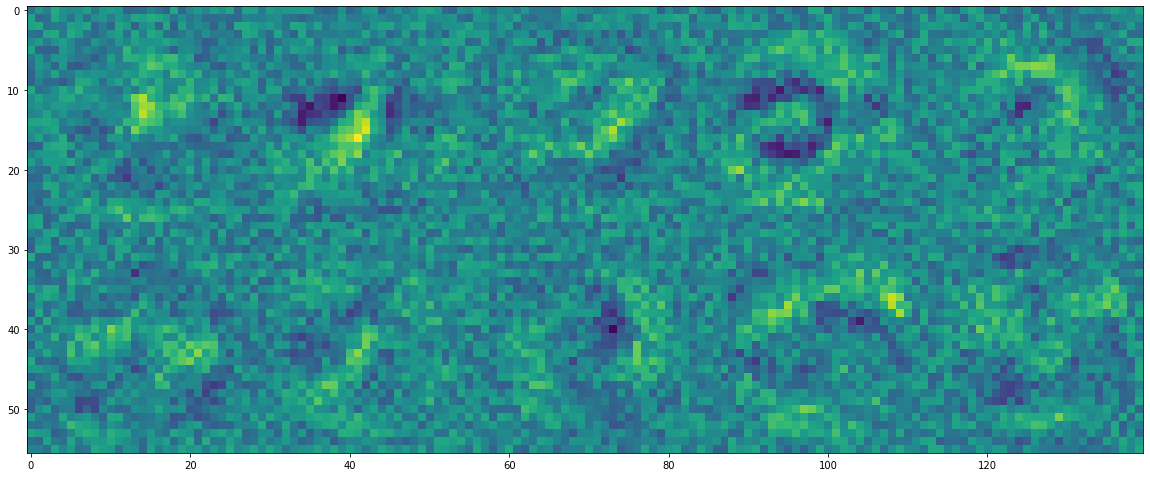

In [ ]:
plot_grid(W1[:,:10].reshape(1,28,28,-1), 2,5)

## Convolutional Neural Network for MNIST

In [ ]:
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

In [ ]:
model = Sequential([
    Reshape(input_shape=(28,28),target_shape=(28,28,1)),
    Conv2D(32,activation="relu",kernel_size=(5,5),strides=(1,1),padding='same'),
    MaxPooling2D((2,2)),
    Conv2D(64,activation="relu",kernel_size=(5,5),strides=(1,1),padding='same'),
    MaxPooling2D((2,2)),
    Conv2D(128,activation="relu",kernel_size=(5,5),strides=(1,1),padding='same'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(100,activation='relu'),
    Dense(10,activation='softmax')
])

In [ ]:
loss_fn = SparseCategoricalCrossentropy(from_logits=False)
model.compile(loss=loss_fn, optimizer="sgd", metrics=["accuracy"])

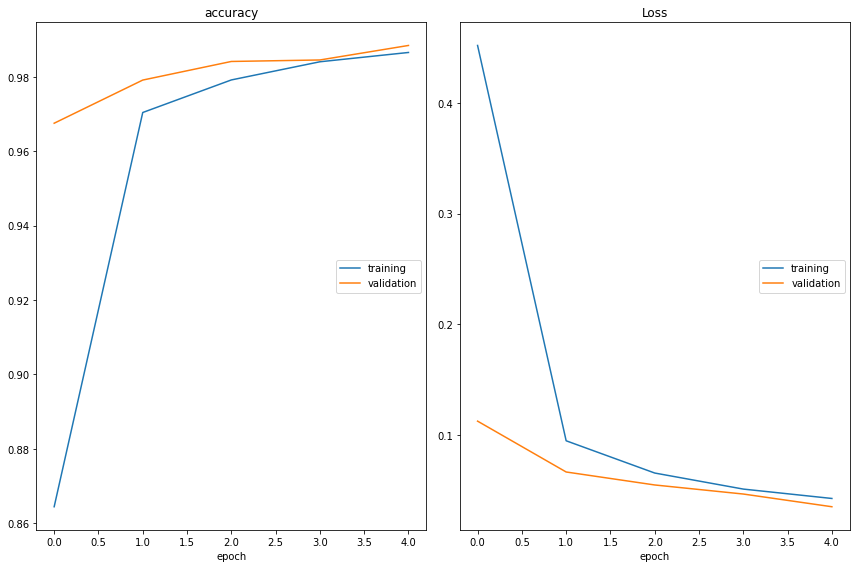

accuracy
	training         	 (min:    0.864, max:    0.987, cur:    0.987)
	validation       	 (min:    0.967, max:    0.988, cur:    0.988)
Loss
	training         	 (min:    0.043, max:    0.452, cur:    0.043)
	validation       	 (min:    0.036, max:    0.113, cur:    0.036)


In [ ]:
model.fit(x_train, y_train,
          epochs=5,
          validation_data=(x_test, y_test),
          callbacks=[PlotLossesKeras()],
          verbose=0)